<a href="https://colab.research.google.com/github/KWSantos/Data-Science/blob/main/ML-AlgorithmsDecision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizagem por Árvore de Decisão

In [12]:
"""
Aprendizagem por árvore de decisão é um tipo de aprendizado supervisionado, que gera uma árvore a partir de uma base de dados de treinamento.
O processo de aprendizagem se dá por pelo cálculo da entropia, dado pela seguinte fórmula:

Entropy(S) = sum(-pi*log(pi)), onde pi é a quantidade de vezes de cada classe sobre a quantidade de elementos da base de dados.

e pelo cáculo do ganho de informação, dado pela seguinte fórmula:

Gain(S,A) = Entropy(S) - sum((|Sv|/|S|)Entropy(Sv)), onde Sv é o tamanho do conjunto de valores de cada atributo previsor, e S é o tamanho da base de dados.

Esse processo define o atributo mais importante que será a raiz da árvore de decisão.
Através de um processo recursivo, o algoritmo irá definir a raiz de cada subárvore a partir da raíz, considerando as classes possíveis do nó pai.
Por exemplo, se definirmos que o mais importante em uma base de risco de crédito é a renda, ela será a raiz da árvore toda, e para cada uma das classes que renda pode ter
(abaixo de 5 mil, entre 5 e 20 mil, e acima de 20 mil), será definida uma subárvore com raiz no atributo que possui maior ganho nas linhas onde a renda pertence a classe da subárvore.

Perceba que para isso, a melhor forma de trabalhar com essas árvores é definindo bons splits, que serão cortes no conjunto de dados com os quais você define as classes.
Dessa forma, o algoritmo irá trabalhar bem sobre o conjunto de dados definindo os atributos previsores mais importantes para a classificação.
Outro conceito importante é o conceito de poda, onde se pode cortar atributos que possuem ganho de informação muito baixo.
A construção da árvore é um problema NP-Completo, causando um desempenho muito lento para grandes bases de dados.
Para melhorar isso, upgrades como o Random Forest foram desenvolvidos.

Referências

https://blog.somostera.com/data-science/arvores-de-decisao
https://www.ibm.com/docs/pt-br/db2/12.1?topic=building-decision-trees
https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle as pkl

##Base de crédito

In [5]:
with open('credit.pkl', 'rb') as f:
    x_credit_train, x_credit_test, y_credit_train, y_credit_test = pkl.load(f)

In [9]:
x_credit_train.shape, y_credit_train.shape, x_credit_test.shape, y_credit_test.shape

((24432, 3), (24432,), (8144, 3), (8144,))

In [10]:
tree_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_credit.fit(x_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
predict_credit_test = tree_credit.predict(x_credit_test)
predict_credit_test

array([1, 1, 1, ..., 1, 0, 0])

In [14]:
accuracy_credit = accuracy_score(y_credit_test, predict_credit_test)
print(f'Acurácia da árvore de decisão para a base de crédito foi de : {accuracy_credit}')

Acurácia da árvore de decisão para a base de crédito foi de : 0.712549115913556


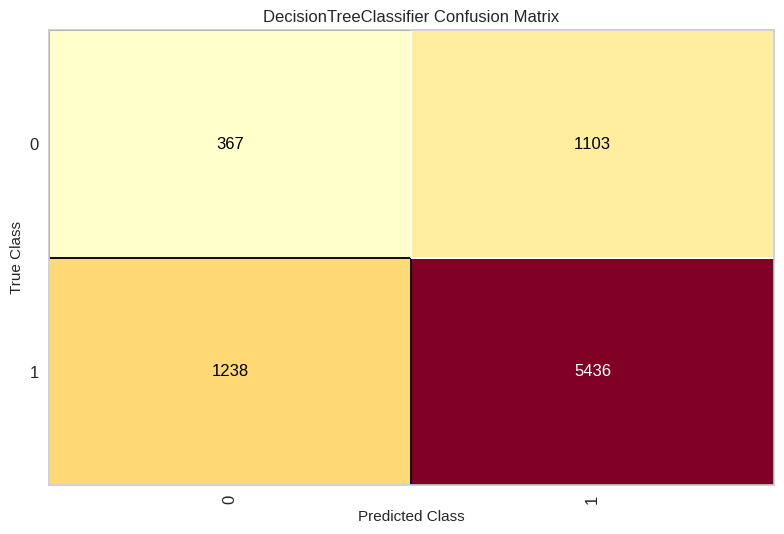

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [20]:
from yellowbrick.classifier import ConfusionMatrix
v = ConfusionMatrix(tree_credit)
v.fit(x_credit_train, y_credit_train)
v.score(x_credit_test, y_credit_test)
v.show()

In [15]:
print(classification_report(y_credit_test, predict_credit_test))

              precision    recall  f1-score   support

           0       0.23      0.25      0.24      1470
           1       0.83      0.81      0.82      6674

    accuracy                           0.71      8144
   macro avg       0.53      0.53      0.53      8144
weighted avg       0.72      0.71      0.72      8144



##Base do censo

In [7]:
with open('census.pkl', 'rb') as f:
    x_census_train, y_census_train, x_census_test, y_census_test = pkl.load(f)

In [8]:
x_census_train.shape, y_census_train.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4884, 108), (4884,))

In [16]:
tree_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_census.fit(x_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
predict_census_test = tree_census.predict(x_census_test)
predict_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [18]:
accuracy_census = accuracy_score(y_census_test, predict_census_test)
print(f'Acurácia da árvore de decisão para a base do censo foi de : {accuracy_census}')

Acurácia da árvore de decisão para a base do censo foi de : 0.8216625716625716


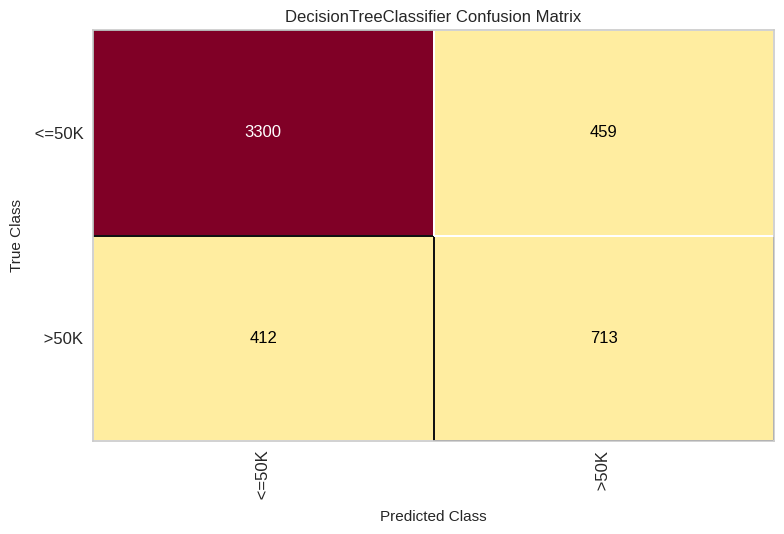

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
cm = ConfusionMatrix(tree_census)
cm.fit(x_census_train, y_census_train)
cm.score(x_census_test, y_census_test)
cm.show()

In [19]:
print(classification_report(y_census_test, predict_census_test))

              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88      3759
        >50K       0.61      0.63      0.62      1125

    accuracy                           0.82      4884
   macro avg       0.75      0.76      0.75      4884
weighted avg       0.82      0.82      0.82      4884



#Random Forest

In [22]:
"""
O Random Forest é uma técnica de aprendizado supervisionado baseada em árvores de decisão que utiliza o conceito de ensemble learning
para melhorar os resultados e a robustez de uma única árvore de decisão. Enquanto uma árvore de decisão comum é construída a partir
de toda a base de dados e pode sofrer de problemas como overfitting e alta variância,
o Random Forest busca superar essas limitações ao construir um conjunto de árvores de decisão independentes e combinar seus resultados.

O algoritmo constrói várias árvores de decisão (daí o nome "floresta") a partir de diferentes subconjuntos da base de dados.
Esses subconjuntos são gerados por amostragem com reposição (técnica chamada de bootstrap), criando variações nos dados usados para treinar cada árvore.

Durante a construção de cada árvore, não são considerados todos os atributos possíveis para determinar o melhor split (ou corte).
Em vez disso, uma seleção aleatória de atributos é feita para cada divisão. Isso reduz a correlação entre as árvores e aumenta a diversidade do modelo.

Para tarefas de classificação, o Random Forest usa uma votação majoritária entre as árvores para determinar a classe final.
Para tarefas de regressão, ele calcula a média das previsões feitas pelas árvores.

O Random Forest pode ser pensado como uma "votação democrática".
Cada árvore, baseada em uma perspectiva ligeiramente diferente dos dados, dá seu "voto" sobre qual deve ser a saída do modelo.
Com isso, erros individuais das árvores são diluídos, e o resultado final tende a ser mais confiável e preciso do que o de uma única árvore de decisão.

Referências

https://www.ibm.com/br-pt/topics/random-forest
https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
"""
from sklearn.ensemble import RandomForestClassifier

##Base de crédito

In [23]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [24]:
predict_credit_test = random_forest_credit.predict(x_credit_test)
predict_credit_test

array([1, 1, 1, ..., 1, 1, 0])

In [25]:
accuracy_credit = accuracy_score(y_credit_test, predict_credit_test)
print(f'Acurácia do Random Forest para a base de crédito foi de : {accuracy_credit}')

Acurácia do Random Forest para a base de crédito foi de : 0.7791011787819253


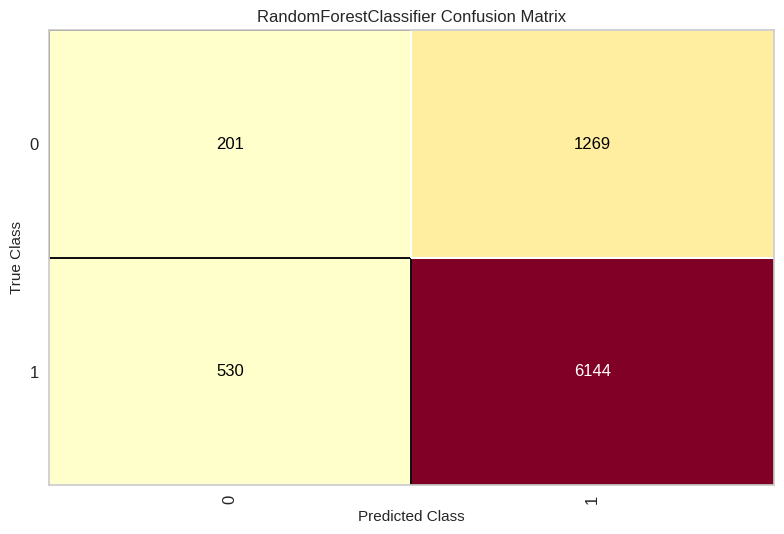

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)
cm.show()

In [27]:
print(classification_report(y_credit_test, predict_credit_test))

              precision    recall  f1-score   support

           0       0.27      0.14      0.18      1470
           1       0.83      0.92      0.87      6674

    accuracy                           0.78      8144
   macro avg       0.55      0.53      0.53      8144
weighted avg       0.73      0.78      0.75      8144



##Base do Censo

In [28]:
random_forest_census = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_train, y_census_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [29]:
predict_census_test = random_forest_census.predict(x_census_test)
predict_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [30]:
accuracy_census = accuracy_score(y_census_test, predict_census_test)
print(f'Acurácia do Random Forest para a base do censo foi de : {accuracy_census}')

Acurácia do Random Forest para a base do censo foi de : 0.8560606060606061


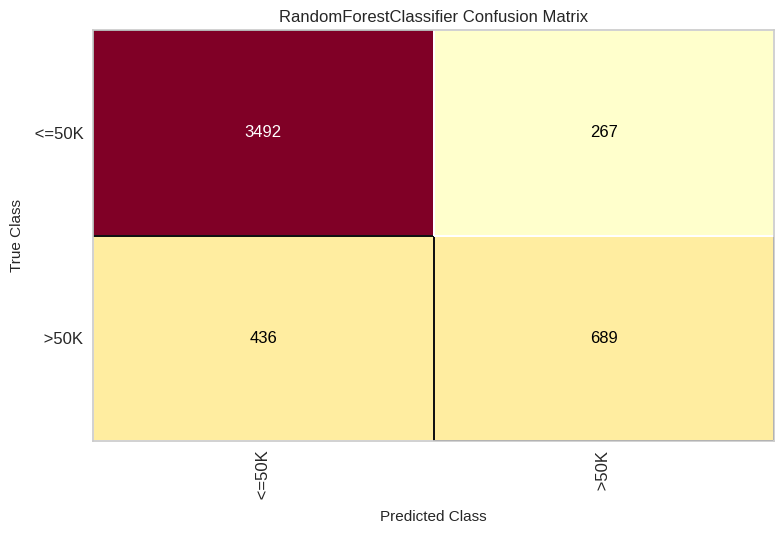

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_train, y_census_train)
cm.score(x_census_test, y_census_test)
cm.show()

In [33]:
print(classification_report(y_census_test, predict_census_test))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3759
        >50K       0.72      0.61      0.66      1125

    accuracy                           0.86      4884
   macro avg       0.80      0.77      0.79      4884
weighted avg       0.85      0.86      0.85      4884

